# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

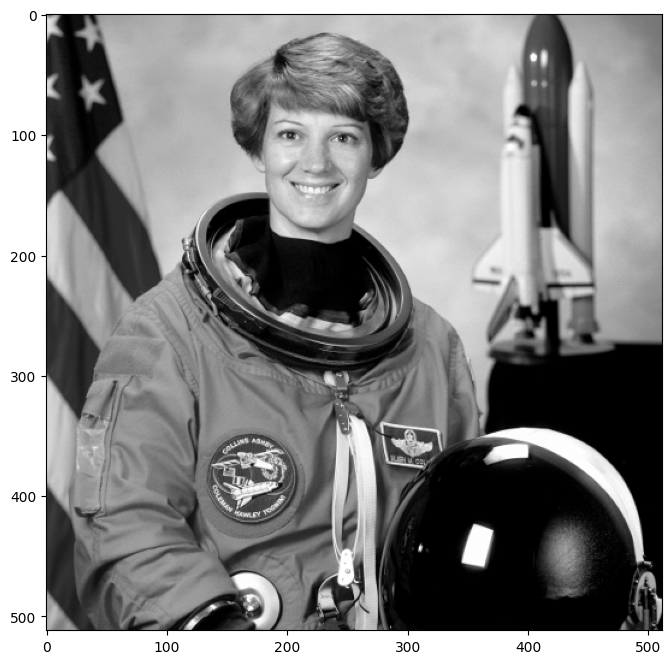

In [5]:
img = plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [23]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            x = q[1]+p[1]-n
            y = q[0]+p[0]-n
            
            if x < img_in.shape[1] and x >=0 and y < img_in.shape[0] and y >=0 :
                neighborhood_sum += img_in[y,x]
            else:
                neighborhood_sum = 0
                break

        result[p] = neighborhood_sum / size**2

    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

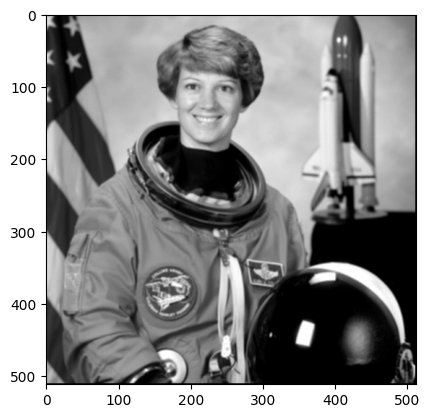

In [23]:
img_filtered = meanfilter(img,3)
plt.imshow(img_filtered, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [24]:
img1 = meanfilter(img,5)
img2 = plt.imread('data/astronaut_meanfilter5.png')

assert numpy.allclose(img1, img2, atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [13]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = list()

        for q in numpy.ndindex(size, size):
            x = q[1]+p[1]-n
            y = q[0]+p[0]-n
            
            if x < img_in.shape[1] and x >=0 and y < img_in.shape[0] and y >=0 :
                neighborhood_list.append(img_in[y,x])
                neighborhood_list.sort()
                m = len(neighborhood_list)

                neighborhood_median = neighborhood_list[m // 2]

            else:
                neighborhood_median = 0
                break

        result[p] = neighborhood_median

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

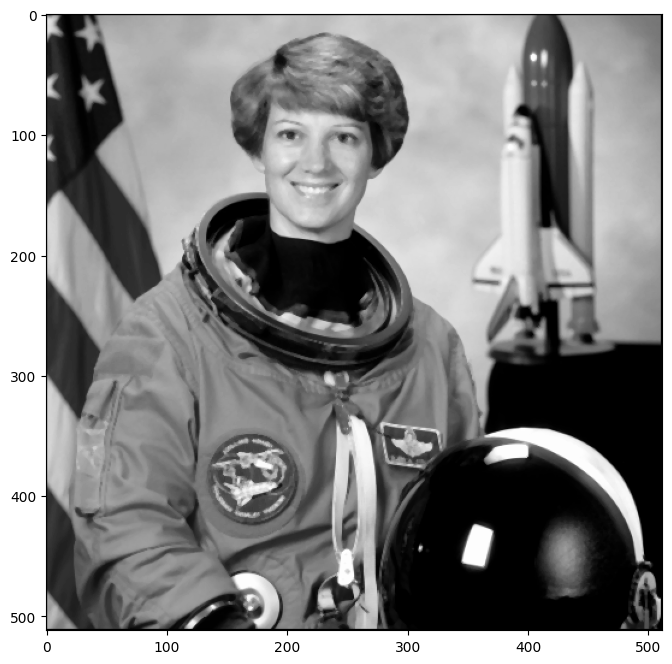

In [14]:
img_median = medianfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_median, 'gray')


Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [15]:
img3 = medianfilter(img,5)
img4 = plt.imread('data/astronaut_medianfilter5.png')

assert numpy.allclose(img3, img4, atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [16]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [29]:
img_mean_scipy = scipy.ndimage.uniform_filter(img, 5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [19]:
img_median_scipy = scipy.ndimage.median_filter(img, 5)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [20]:
img_gauss_scipy = scipy.ndimage.gaussian_filter(img, 1)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

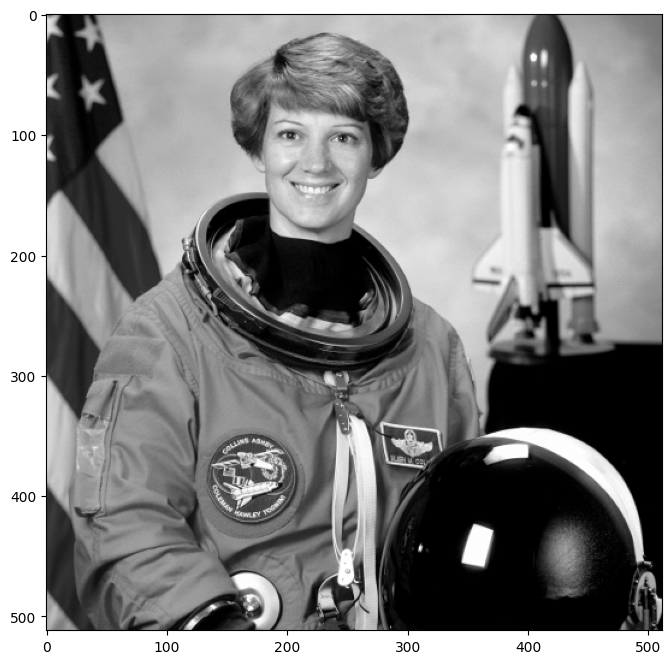

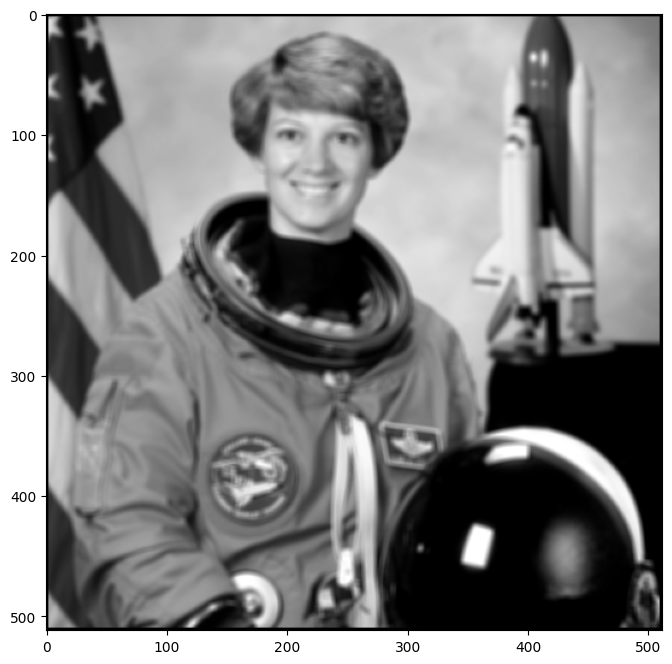

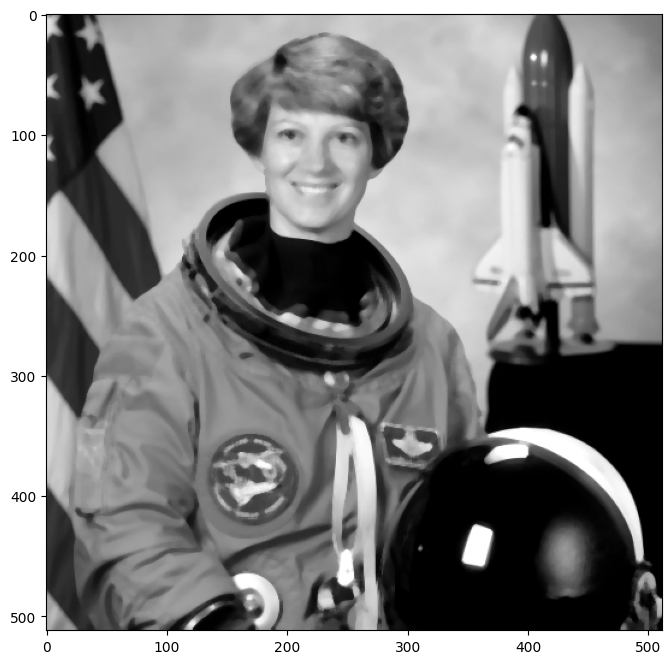

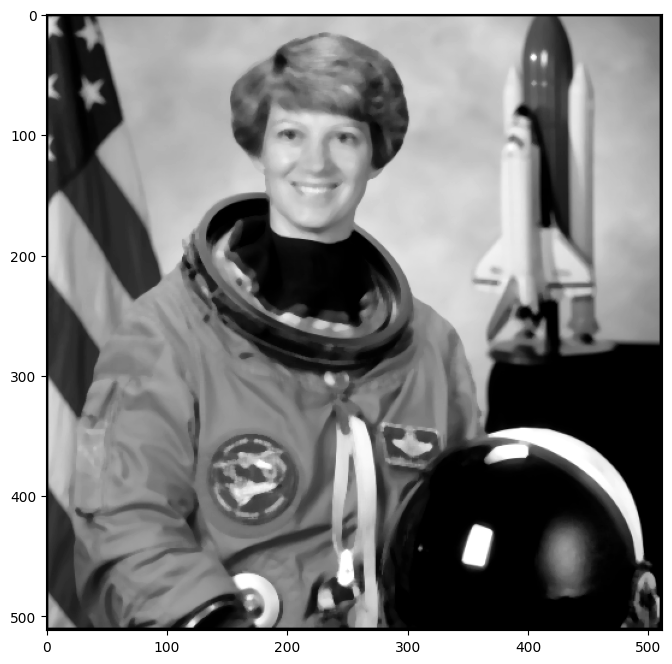

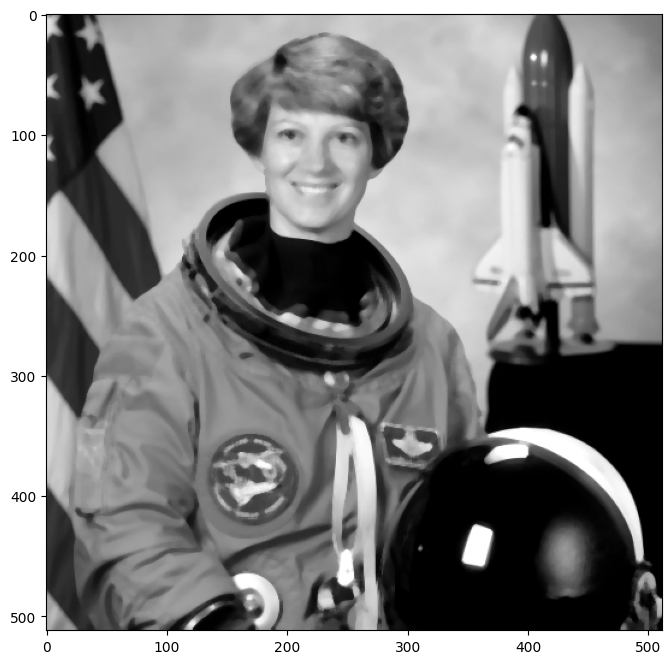

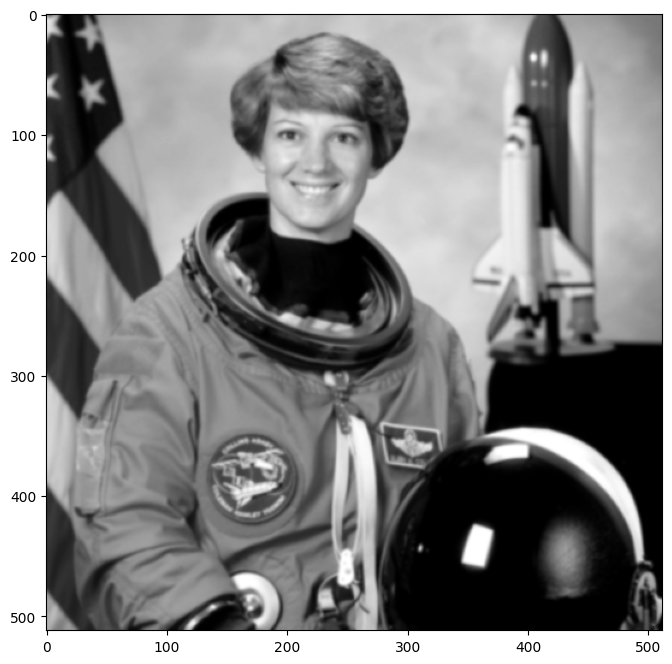

In [27]:
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')

plt.figure(figsize=(15,8))
plt.imshow(img1, 'gray')

plt.figure(figsize=(15,8))
plt.imshow(img_mean_scipy, 'gray')

plt.figure(figsize=(15,8))
plt.imshow(img3, 'gray')

plt.figure(figsize=(15,8))
plt.imshow(img_median_scipy, 'gray')

plt.figure(figsize=(15,8))
plt.imshow(img_gauss_scipy, 'gray')

Difference:
no black boundaries in the scipy filter; reason: our filter size=5 has two pixels at the boundary with intensity=0
in the scipy filter boundary is not black, but pixels for the edge is reflected,/not considered...

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: